In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px
from scipy.interpolate import griddata
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Figures for SACNAS poster

In [4]:
# calling in g4 dataset and hyperpro profile dataset to make figures
g4_data = pd.read_csv('../data/g4_metadata.csv')

df = pd.read_csv('../data/Gradients 4 - TN397 - Hyperpro Profiles.csv', usecols = ['kpar', 'flu', 'light_level', 'par_z', 'sal', 'dens', 'temp', 'time', 'lat', 'lon', 'depth'])
df['time'] = pd.DatetimeIndex(df.time.values)
df.dropna()
# creating a groupby to match hyperpro PAR with calibrated PAR which is in an hourly resolution
hyperpro = df.groupby([pd.Grouper(key = 'time', freq = 'H'), 'depth']).agg({'par_z': 'mean',
                                                             'temp': 'mean',
                                                             'flu': 'mean'}).reset_index()

## Plot for hourly uncalibrated and calibrated PAR

#### This plot displays the improvement of PAR calibration and just how close it gets to an accurate PAR sensor. Sensor 1 in this plot signifies the uncalibrated PAR from the ship radiometer. Sensor 2 signifies calibrated PAR from another radiometer called LICOR. The LICOR radiometer is already calibrated but because it is not present during most cruises, Sensor 1 (ship radiometer) is the default. The black line is an identity line the closer the dots are to it, the more accurate it is to Sensor 2.

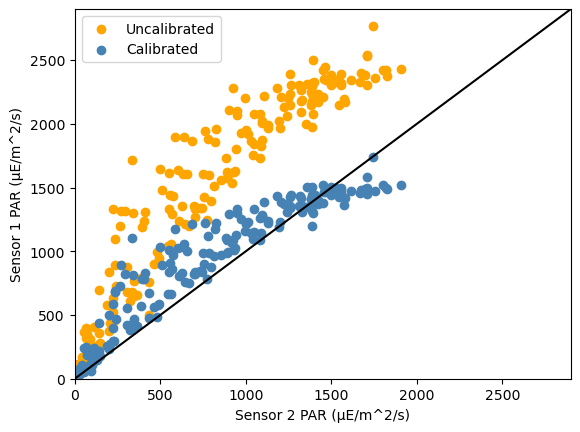

In [5]:
# licor against ship
x = g4_data['licor_par']
y = g4_data['par']
plt.scatter(x, y, color='orange', label = 'Uncalibrated')

# licor against sat
y1 = g4_data['sat_par']
plt.scatter(x, y1, color='steelblue', label = 'Calibrated')
plt.xlabel("Sensor 2 PAR (μE/m^2/s)")
plt.ylabel("Sensor 1 PAR (μE/m^2/s)")
plt.legend()
plt.xlim(0, 2900)
plt.ylim(0, 2900)

x1= np.linspace(0,2900,2900) 
plt.plot(x1,x1,'k-') # identity line
plt.rcParams.update({'font.size':15})

plt.show()

## Daily Uncalibrated PAR

#### This plot displays uncalibrated PAR during the duration of the Gradients 4 cruise. Each tick mark represent daily data but the dates shown are every other day, each rise and fall of plot signifies the day and every dot on the plot signfies every hour. I set the variables to time and par and used plt.subplot to complete plot.

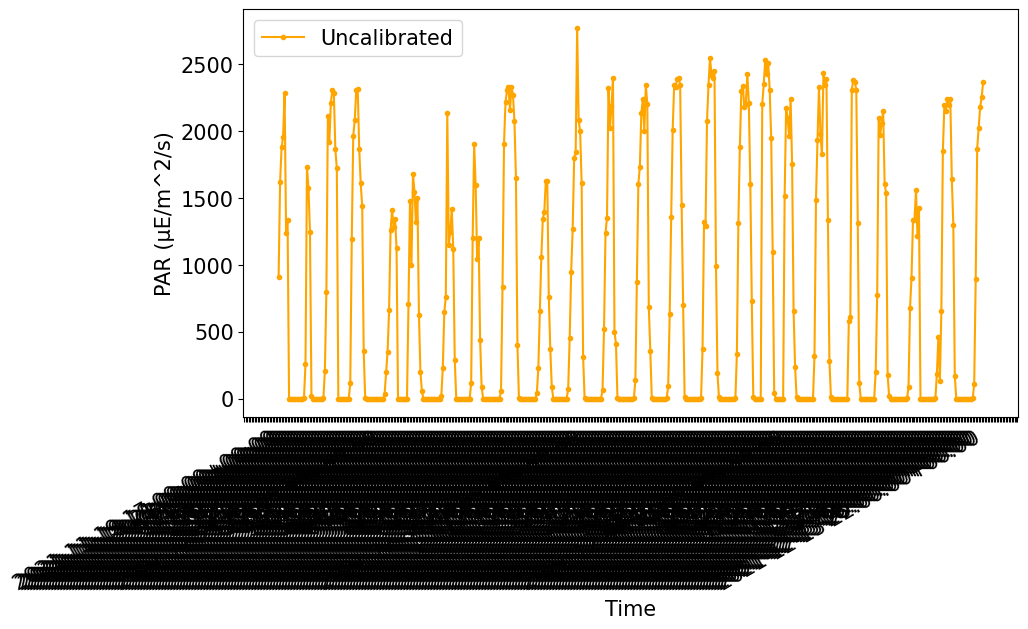

In [6]:
# setting variables

x = g4_data['time']
y1 = g4_data['par']

fig, axs = plt.subplots(sharex = True, nrows = 1, ncols = 1, figsize = (10, 6))
# plots carbon quota data
axs.plot(x, y1, c='orange', marker = '.', label = 'Uncalibrated')

axs.set_xlabel('Time')
axs.set_ylabel('par')
axs.set_ylabel('PAR (μE/m^2/s)')
axs.legend(loc = 'upper left')
#plt.title('G4 TN397 Ship Uncalibrated PAR', fontsize = 15)
# sets tick marks for every day
axs.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
# formates date labels sidewayw
plt.gcf().autofmt_xdate()
# this sets the label for dates to show every other day 
for label in axs.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.rcParams.update({'font.size':15})
plt.show()

## Daily Uncalibrated and Calibrated PAR

#### Did the same code as above except I added another line of ax.plot to get the calibrated PAR on top of the uncalibrated par for better comparison. 

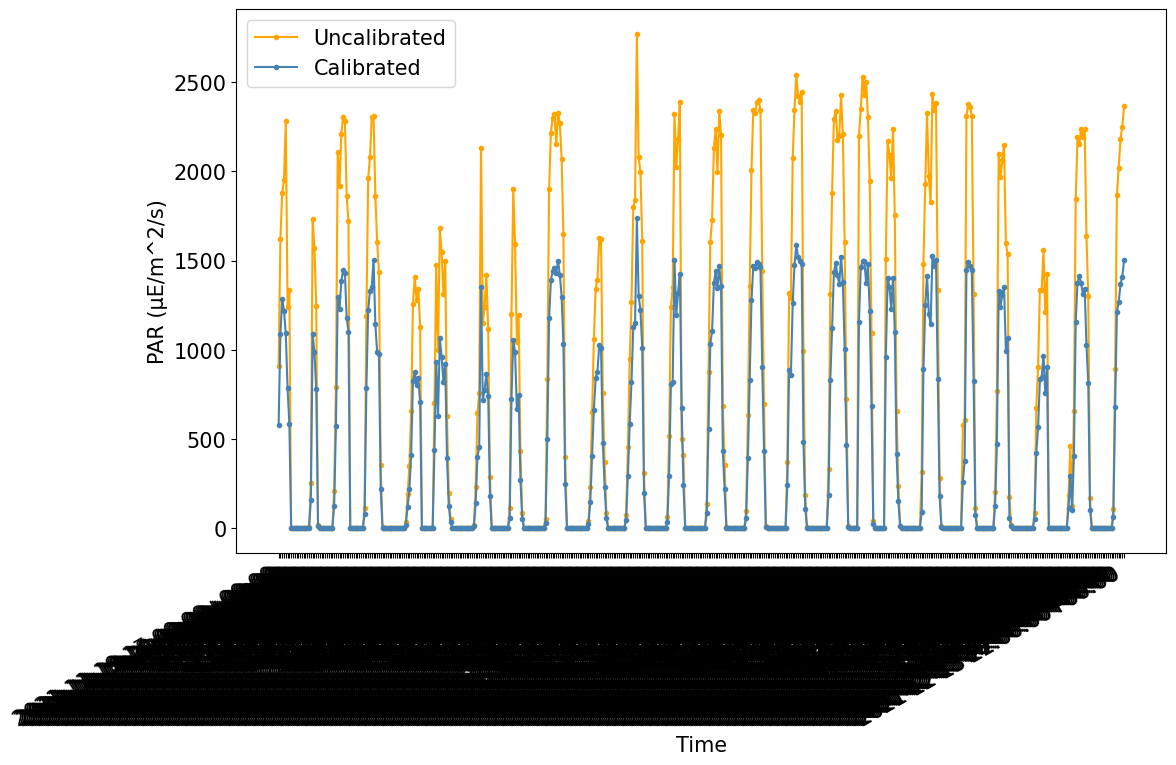

In [10]:
# setting variables
x = g4_data['time']
y = g4_data['sat_par']
y1 = g4_data['par']

fig, ax = plt.subplots(sharex = True, nrows = 1, ncols = 1, figsize = (12, 8))
# plots PAR data
ax.plot(x, y1, c='orange', marker = '.', label = 'Uncalibrated')
ax.plot(x, y, c='steelblue', marker = '.', label = 'Calibrated')

ax.set_xlabel('Time')
ax.set_ylabel('par')
ax.set_ylabel('PAR (μE/m^2/s)')
ax.legend(loc = 'upper left')
# sets tick marks for every day
axs.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
# formates date labels sideways
plt.gcf().autofmt_xdate()
# this sets the label for dates to show every other day 
for label in axs.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.rcParams.update({'font.size':15})
plt.show()

## Hyperpro depth profile 

#### This plot is to confirm the values found from the depth integrated PAR I calculated for Gradients 4. This plot displays a depth profile of a device called hyperpro and collects accurate PAR data. Like the LICOR radiometer, it is not present during most cruises. Red line signifies range of PAR values that should match depth integrated PAR.

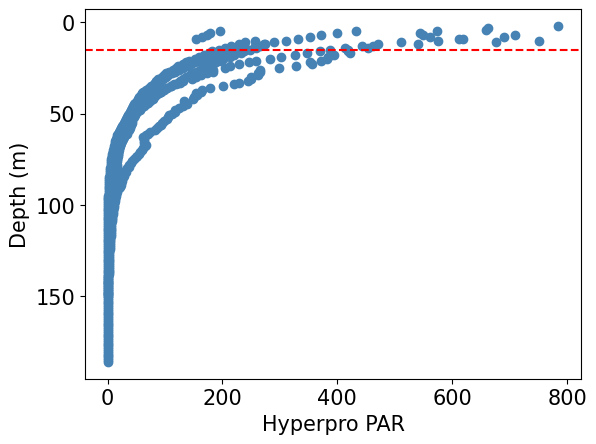

In [12]:
x = hyperpro['par_z']
y1 = hyperpro['depth']

plt.scatter(x, y1, c = 'steelblue', label = 'PAR')

plt.axhline(y= 15, color='r', linestyle='--')

plt.rcParams.update({'font.size':15})

plt.xlabel("Hyperpro PAR")
plt.ylabel("Depth (m)")
plt.gca().invert_yaxis()

plt.show()